# Predicting Building Damage from Earthquakes

**Problem Statement:**</br>
To predict the damage grade for the building from an earthquake. 

**Content:**</br>
It is a multiclass supervised learning problem.For the model training purpose we are using earthquake data collected from an </br>open portal. .our target variable has 5 classes, labelled 'Grade 1':'Grade 5' which each represent the different scale of </br>damage sustained to the building.</br>

**Acknoledgement:**</br>
This Data collected from Nepal earthquake open portal.The earthquake in question was 7.8 in magnitude and occured near the </br>Gorkha district of Gandaki Pradesh, Nepal.

<h2>1. Data Collection</h2>

In [228]:
# Importing libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import scipy
import math
from scipy.stats.mstats import winsorize
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [229]:
import warnings
warnings.filterwarnings("ignore")

In [230]:
# Read the dataset
df=pd.read_csv("csv_building_structure.csv")

# 2.Data Understanding

In [231]:
# Check the first 3 rows
df.head(3)

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,land_surface_condition,foundation_type,...,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade
0,1.200000e+11,12,1207,120703,1,9,288.0,9,Flat,Other,...,0,0,0,0,0,1,0,0,0,Grade 3
1,1.200000e+11,12,1207,120703,1,15,364.0,9,Flat,Other,...,0,0,0,0,0,1,0,0,0,Grade 5
2,1.200000e+11,12,1207,120703,1,20,384.0,9,Flat,Other,...,0,0,0,0,0,0,0,0,0,Grade 2


In [232]:
# Check the last 3 rows
df.tail(3)

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,land_surface_condition,foundation_type,...,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade
762103,3.670000e+11,36,3603,360302,2,35,342.0,18,Flat,Mud mortar-Stone/Brick,...,0,0,0,0,0,0,0,0,0,Grade 5
762104,3.670000e+11,36,3603,360302,2,19,306.0,18,Flat,Mud mortar-Stone/Brick,...,0,0,0,0,0,0,0,0,0,Grade 5
762105,3.670000e+11,36,3603,360302,2,12,840.0,18,Flat,Mud mortar-Stone/Brick,...,0,0,0,0,0,0,0,0,0,Grade 5


In [233]:
# Check for the data type of the data with respect to columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762106 entries, 0 to 762105
Data columns (total 27 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   building_id                             762106 non-null  float64
 1   district_id                             762106 non-null  int64  
 2   vdcmun_id                               762106 non-null  int64  
 3   ward_id                                 762106 non-null  int64  
 4   count_floors_pre_eq                     762106 non-null  int64  
 5   age_building                            762106 non-null  int64  
 6   plinth_area_sq_ft                       762078 non-null  float64
 7   height_ft_pre_eq                        762106 non-null  int64  
 8   land_surface_condition                  762106 non-null  object 
 9   foundation_type                         762106 non-null  object 
 10  roof_type                               7620

In [234]:
# Check the shape of the data
df.shape

(762106, 27)

In [235]:
#columns
df.columns

Index(['building_id', 'district_id', 'vdcmun_id', 'ward_id',
       'count_floors_pre_eq', 'age_building', 'plinth_area_sq_ft',
       'height_ft_pre_eq', 'land_surface_condition', 'foundation_type',
       'roof_type', 'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'damage_grade'],
      dtype='object')

In [236]:
#data types
df.dtypes

building_id                               float64
district_id                                 int64
vdcmun_id                                   int64
ward_id                                     int64
count_floors_pre_eq                         int64
age_building                                int64
plinth_area_sq_ft                         float64
height_ft_pre_eq                            int64
land_surface_condition                     object
foundation_type                            object
roof_type                                  object
ground_floor_type                          object
other_floor_type                           object
position                                   object
plan_configuration                         object
has_superstructure_adobe_mud                int64
has_superstructure_mud_mortar_stone         int64
has_superstructure_stone_flag               int64
has_superstructure_cement_mortar_stone      int64
has_superstructure_mud_mortar_brick         int64


In [237]:
# Categorical column
cat_col=df.select_dtypes(include="object").columns
cat_col

Index(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'damage_grade'],
      dtype='object')

In [238]:
# Numerical column
num_col=df.select_dtypes(exclude="object").columns
num_col

Index(['building_id', 'district_id', 'vdcmun_id', 'ward_id',
       'count_floors_pre_eq', 'age_building', 'plinth_area_sq_ft',
       'height_ft_pre_eq', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other'],
      dtype='object')

In [239]:
# Categorical Data
df[cat_col].head(3)

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,damage_grade
0,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Grade 3
1,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Grade 5
2,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Grade 2


In [240]:
# Numerical Data
df[num_col].head(3)

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
0,1.200000e+11,12,1207,120703,1,9,288.0,9,0,1,0,0,0,0,0,1,0,0,0
1,1.200000e+11,12,1207,120703,1,15,364.0,9,0,1,0,0,0,0,0,1,0,0,0
2,1.200000e+11,12,1207,120703,1,20,384.0,9,0,1,0,0,0,0,0,0,0,0,0


In [241]:
# Statistics of the dataset(numeric)
df.describe()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
count,7.621060e+05,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762078.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000
mean,2.607908e+11,25.767835,2582.688357,258274.277335,2.087783,24.326405,406.673039,16.049372,0.042401,0.800271,0.035121,0.015815,0.022961,0.071525,0.258766,0.080482,0.039794,0.016386,0.012026
std,5.801505e+10,5.807555,581.172767,58117.348412,0.655101,65.043704,226.782716,5.493878,0.201502,0.399797,0.184086,0.124761,0.149780,0.257701,0.437957,0.272039,0.195474,0.126955,0.109001
min,1.200000e+11,12.000000,1201.000000,120101.000000,1.000000,0.000000,70.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.220000e+11,22.000000,2204.000000,220402.000000,2.000000,9.000000,280.000000,12.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.460000e+11,24.000000,2410.000000,241004.000000,2.000000,16.000000,358.000000,16.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.040000e+11,30.000000,3010.000000,301006.000000,2.000000,27.000000,470.000000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,3.670000e+11,36.000000,3611.000000,361108.000000,9.000000,999.000000,5000.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Insight: </br>
    1.By looking into the above table , We can see that theere are wide range of values for some Feature</br>
    2. So we need to do pull down those values to the same range by using standisation or Normalisation</br>

In [242]:
df.describe(include='object').T

,count,unique,top,freq
land_surface_condition,762106,3,Flat,631675
foundation_type,762106,5,Mud mortar-Stone/Brick,628716
roof_type,762080,3,Bamboo/Timber-Light roof,503722
ground_floor_type,762106,5,Mud,618217
other_floor_type,762106,4,TImber/Bamboo-Mud,486907
position,762105,4,Not attached,604453
plan_configuration,762105,10,Rectangular,731257
damage_grade,762094,5,Grade 5,275766


In [243]:
#null values in the dataset
df.isna().sum()

building_id                                0
district_id                                0
vdcmun_id                                  0
ward_id                                    0
count_floors_pre_eq                        0
age_building                               0
plinth_area_sq_ft                         28
height_ft_pre_eq                           0
land_surface_condition                     0
foundation_type                            0
roof_type                                 26
ground_floor_type                          0
other_floor_type                           0
position                                   1
plan_configuration                         1
has_superstructure_adobe_mud               0
has_superstructure_mud_mortar_stone        0
has_superstructure_stone_flag              0
has_superstructure_cement_mortar_stone     0
has_superstructure_mud_mortar_brick        0
has_superstructure_cement_mortar_brick     0
has_superstructure_timber                  0
has_supers

# 3. Data Cleaning

# 3a. Handling of Null Values

In [244]:
# Check for the Missing Values
df.isna().sum()

building_id                                0
district_id                                0
vdcmun_id                                  0
ward_id                                    0
count_floors_pre_eq                        0
age_building                               0
plinth_area_sq_ft                         28
height_ft_pre_eq                           0
land_surface_condition                     0
foundation_type                            0
roof_type                                 26
ground_floor_type                          0
other_floor_type                           0
position                                   1
plan_configuration                         1
has_superstructure_adobe_mud               0
has_superstructure_mud_mortar_stone        0
has_superstructure_stone_flag              0
has_superstructure_cement_mortar_stone     0
has_superstructure_mud_mortar_brick        0
has_superstructure_cement_mortar_brick     0
has_superstructure_timber                  0
has_supers

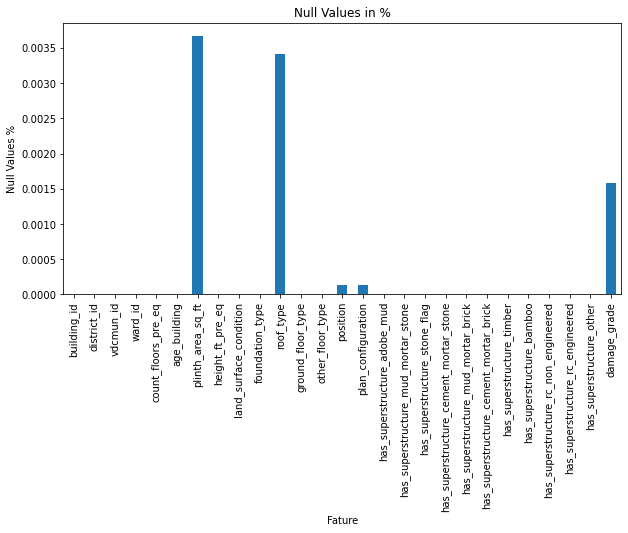

In [245]:
# in Percentage
plt.figure(figsize=(10,5))
((df.isnull().sum()/len(df))*100).plot(kind='bar')
plt.title("Null Values in %")
plt.xlabel('Fature')
plt.ylabel('Null Values %')
plt.show()

Note: We can go for droping the null values. But here, I am handling null values in 2 features to include the steps

In [246]:
# we will drop the null values in the damage grade, position & plan Configuration columns
col_to_drop=["position","plan_configuration","damage_grade"]
for col in col_to_drop:
    i=df[df[col].isnull()].index
    print(i)

Int64Index([131652], dtype='int64')
Int64Index([131652], dtype='int64')
Int64Index([ 83766, 131558, 131579, 131627, 131629, 131640, 131652, 131654,
            131655, 131656, 131929, 131932],
           dtype='int64')


In [247]:
index=[83766, 131558, 131579, 131627, 131629, 131640, 131652, 131654,131655, 131656, 131929, 131932]

In [248]:
for i in index:
    df.drop(i,axis=0,inplace=True)

In [249]:
df["damage_grade"].value_counts()

Grade 5    275766
Grade 4    183844
Grade 3    136412
Grade 2     87257
Grade 1     78815
Name: damage_grade, dtype: int64

In [250]:
df.isna().sum()

building_id                                0
district_id                                0
vdcmun_id                                  0
ward_id                                    0
count_floors_pre_eq                        0
age_building                               0
plinth_area_sq_ft                         28
height_ft_pre_eq                           0
land_surface_condition                     0
foundation_type                            0
roof_type                                 26
ground_floor_type                          0
other_floor_type                           0
position                                   0
plan_configuration                         0
has_superstructure_adobe_mud               0
has_superstructure_mud_mortar_stone        0
has_superstructure_stone_flag              0
has_superstructure_cement_mortar_stone     0
has_superstructure_mud_mortar_brick        0
has_superstructure_cement_mortar_brick     0
has_superstructure_timber                  0
has_supers

Text(0.5, 1.0, 'disribustion of plinth_area_sq_ft')

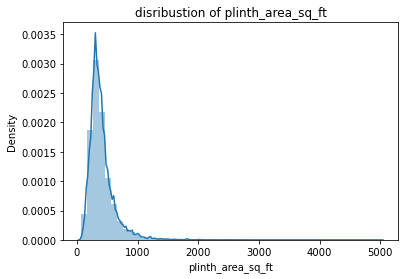

In [251]:
#Handling of null values in plinth_area_sq_ft,roof_type
plt.Figure(figsize=(18,8))
df["plinth_area_sq_ft"].unique()
sns.distplot(df["plinth_area_sq_ft"])
plt.title("disribustion of plinth_area_sq_ft")

Insight: Since its a skewed data, We will go for capping with median values

In [252]:
df["roof_type"].value_counts()
df["roof_type"].mode()
df["roof_type"].dtype
df["plinth_area_sq_ft"].dtype

dtype('float64')

In [253]:
df.groupby("roof_type")["plinth_area_sq_ft"].median()

roof_type
Bamboo/Timber-Heavy roof    360.0
Bamboo/Timber-Light roof    345.0
RCC/RB/RBC                  700.0
Name: plinth_area_sq_ft, dtype: float64

In [254]:
def impute_plinth_area(cols):
    rtype=cols[0]
    plinth=cols[1]
    if pd.isnull(plinth):
        if rtype == "Bamboo/Timber-Heavy roof" :
            return 360
        elif rtype == "Bamboo/Timber-Light roof" :
            return 345
        elif rtype == "RCC/RB/RBC" :
            return 700
    else:
        return plinth

In [255]:
df["roof_type"].unique()

array(['Bamboo/Timber-Light roof', 'Bamboo/Timber-Heavy roof', nan,
       'RCC/RB/RBC'], dtype=object)

In [256]:
# handle the missing values based on type of the column

df["roof_type"]=df["roof_type"].fillna(df["roof_type"].mode()[0])

In [257]:
df["plinth_area_sq_ft"]=df[["roof_type","plinth_area_sq_ft"]].apply(impute_plinth_area,axis=1)

In [258]:
df.isna().sum()

building_id                               0
district_id                               0
vdcmun_id                                 0
ward_id                                   0
count_floors_pre_eq                       0
age_building                              0
plinth_area_sq_ft                         0
height_ft_pre_eq                          0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [259]:
df["plinth_area_sq_ft"].value_counts()

300.0     27655
450.0     21321
400.0     19961
350.0     19163
360.0     14967
          ...  
2082.0        1
4470.0        1
3410.0        1
1749.0        1
2247.0        1
Name: plinth_area_sq_ft, Length: 2129, dtype: int64

# 3b. Handling of duplicate Rows

In [260]:
#To check the duplicates
df[df.duplicated()]

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,land_surface_condition,foundation_type,...,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade
262,1.200000e+11,12,1207,120703,2,3,322.0,16,Flat,Mud mortar-Stone/Brick,...,0,0,0,0,0,0,0,0,0,Grade 1
348,1.200000e+11,12,1207,120703,1,26,322.0,9,Flat,Mud mortar-Stone/Brick,...,0,0,0,0,0,0,0,0,0,Grade 3
373,1.200000e+11,12,1207,120703,2,10,459.0,15,Flat,Mud mortar-Stone/Brick,...,0,0,0,0,0,0,0,0,0,Grade 1
377,1.200000e+11,12,1207,120703,2,15,459.0,15,Flat,Mud mortar-Stone/Brick,...,0,0,0,0,0,0,0,0,0,Grade 2
378,1.200000e+11,12,1207,120703,2,24,459.0,15,Flat,Mud mortar-Stone/Brick,...,0,0,0,0,0,0,0,0,0,Grade 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762037,3.670000e+11,36,3603,360302,2,5,360.0,18,Flat,Mud mortar-Stone/Brick,...,0,0,0,0,0,0,0,0,0,Grade 5
762047,3.670000e+11,36,3603,360302,2,80,483.0,18,Flat,Mud mortar-Stone/Brick,...,0,0,0,0,0,0,0,0,0,Grade 5
762078,3.670000e+11,36,3603,360302,2,20,378.0,18,Flat,Mud mortar-Stone/Brick,...,0,0,0,0,0,0,0,0,0,Grade 5
762087,3.670000e+11,36,3603,360302,2,35,550.0,18,Flat,Mud mortar-Stone/Brick,...,0,0,0,0,0,0,0,0,0,Grade 5


In [261]:
# Selecting duplicate rows except first
# occurrence based on all columns
df.drop_duplicates(keep='first',inplace=True)

In [262]:
df.shape

(723524, 27)

# 3c. Changing the data type of Height and age into float type

In [263]:
df["height_ft_pre_eq"]=df["height_ft_pre_eq"].astype("float64")
df["age_building"]=df["age_building"].astype("float64")

In [264]:
df.dtypes

building_id                               float64
district_id                                 int64
vdcmun_id                                   int64
ward_id                                     int64
count_floors_pre_eq                         int64
age_building                              float64
plinth_area_sq_ft                         float64
height_ft_pre_eq                          float64
land_surface_condition                     object
foundation_type                            object
roof_type                                  object
ground_floor_type                          object
other_floor_type                           object
position                                   object
plan_configuration                         object
has_superstructure_adobe_mud                int64
has_superstructure_mud_mortar_stone         int64
has_superstructure_stone_flag               int64
has_superstructure_cement_mortar_stone      int64
has_superstructure_mud_mortar_brick         int64


<h2>4.Expolratory Data Analysis</h2>

**Checking how balanced our dataset is**

In [265]:
df["damage_grade"].value_counts()


Grade 5    253777
Grade 4    175797
Grade 3    131894
Grade 2     85458
Grade 1     76598
Name: damage_grade, dtype: int64

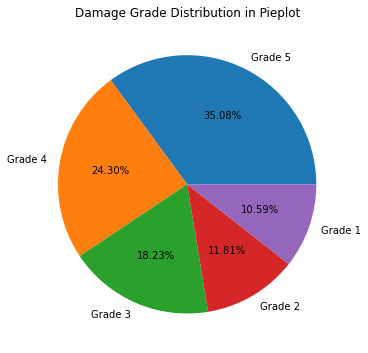

In [266]:
# First we will checkhow balanced our datasets really is
plt.figure(figsize=(10,5))

# plt.subplot(1,2,1)
# sns.countplot(x="damage_grade",data=df,order = ['Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5'])
# plt.title("Damage Grade Distribution in Barplot")
# plt.xticks(rotation=90)
# plt.tight_layout()

labels=["Grade 5","Grade 4","Grade 3","Grade 2","Grade 1"]
plt.subplot(1,2,2)
plt.pie(df["damage_grade"].value_counts().values,labels=labels,autopct='%.2f%%')
plt.title("Damage Grade Distribution in Pieplot")
plt.tight_layout()

Insight:</br> 
    1. From the above plot we can see that , our dataset is very imbalanced</br>
    2.It might be because of the intensity of earthquake</br>
    3.since this data collected after the earthquake and its very likely that damge</br> of the building is highly correlated to the intensity of earthquake</br>
    4. decision trees and random forests algorithms are extremely sensitive to imbalanced data.</br>
    5. We will make the data into balanced data before modeling

**Checking the skewness using Histogram**

		Skewness of the Continous Features


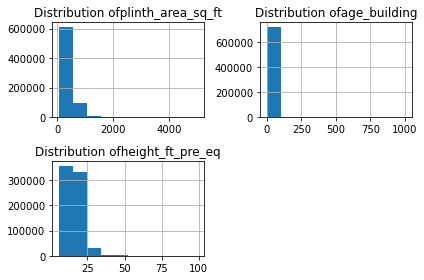

In [267]:
array=["plinth_area_sq_ft","age_building","height_ft_pre_eq"]
print("\t\tSkewness of the Continous Features")
for i in enumerate(array):
    plt.subplot(2,2,i[0]+1)
    df[i[1]].hist()
    a=str(i[1])
    plt.title("Distribution of"+a)
    plt.tight_layout()

Insight:</br>
    1. We can see that above features are right skewed</br>
    2. Most of teh data falls to the right</br>
    3. tail is longer to the right side

**Checking the Outliers using Boxplot**

	Checking the presence of Outliers in the Continues Featues


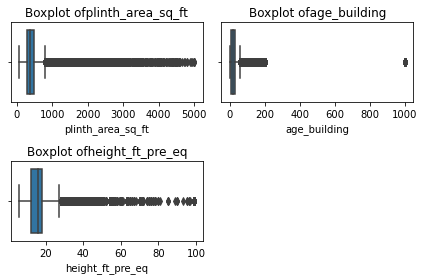

In [268]:
array=["plinth_area_sq_ft","age_building","height_ft_pre_eq"]
print("\tChecking the presence of Outliers in the Continues Featues")
for i in enumerate(array):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(df[i[1]])
    a=str(i[1])
    plt.title("Boxplot of"+a)
    plt.tight_layout()

Insight:</br>
1. We can see that above continous features have outliers</br>
2. these outliers are positive type</br>
3. We can see age of building has value 1000, that we need to look further</br>
4. We will handle these outliers in preporocessing section</br>

**Correlation using scatter plot**

Text(0.5, 1.0, 'Plinth_area vs Height')

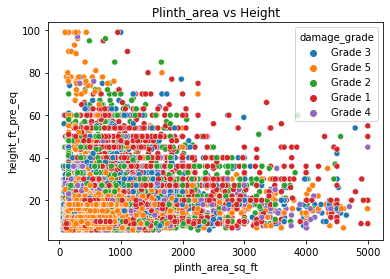

In [269]:
sns.scatterplot(x="plinth_area_sq_ft",y="height_ft_pre_eq",data=df,hue="damage_grade")
plt.title("Plinth_area vs Height")

Insight:</br>
    1. Plinth_area and Height are very scattered<br>
    2. No linear relation between these 2 features

**Correlation of numerical features using Heatmap**

In [270]:
# correlation between features using Heatmap
df_corr=df.copy()

In [271]:
df_corr.drop(["building_id","district_id","vdcmun_id","ward_id"],axis=1,inplace=True)

In [272]:
df_corr.drop(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration'],axis=1,inplace=True)

Text(0.5, 1.0, 'Correlation between Numerical Features')

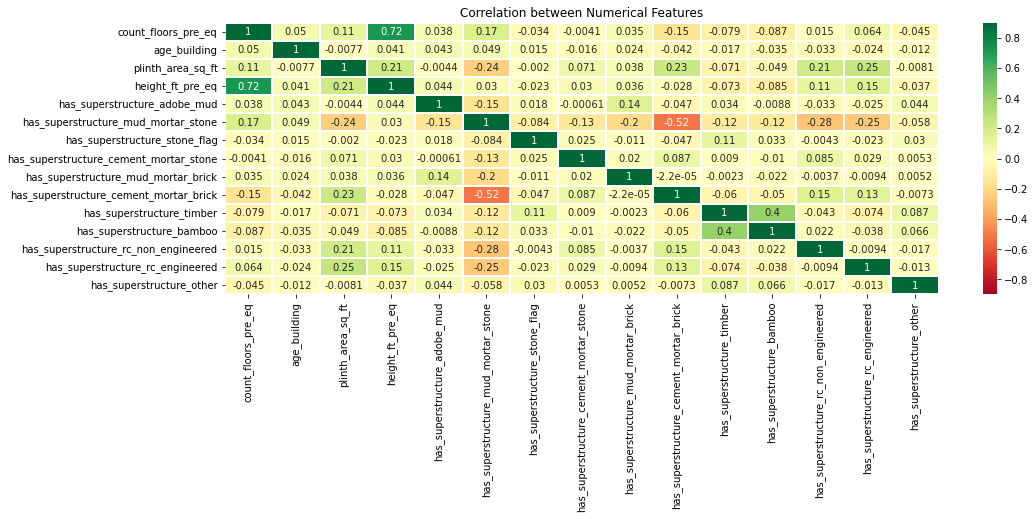

In [273]:
corr_matrix=df_corr.corr()
plt.figure(figsize=(16,5))
sns.heatmap(corr_matrix,linewidths=0.2,cmap='RdYlGn',annot=True,vmin=-0.9,vmax=0.9)
plt.title("Correlation between Numerical Features")

Insight: There is no High Positive & Negative Correlated Features

In [274]:
df_cat=df[cat_col]
df_cat.drop("damage_grade",axis=1,inplace=True)

In [275]:
cat_col

Index(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'damage_grade'],
      dtype='object')

**Correlation between Categorical Features(land_surface_condition and damage_grade)**

In [276]:
# Correlation between land_surface_condition and damage_grade

data_Crosstab=pd.crosstab(index=df["land_surface_condition"], columns=df['damage_grade'])
data_Crosstab

damage_grade,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5
land_surface_condition,,,,,
Flat,66801,71556,107289,142053,210684
Moderate slope,7914,11636,20175,27512,34130
Steep slope,1883,2266,4430,6232,8963


Insight: </br>
1. From above table we can conclude that damage grade is highly correlated with Flat type land_surface condition</br>
2. But the fact is, Most of land type in Nepal is Falt type

**Plots to see the relation Between descrete numerical features and our response variable**

Count of Floor vs Damage Grade

Text(0.5, 1.0, 'Distribution of Damage Grade by count_floors_pre_eq')

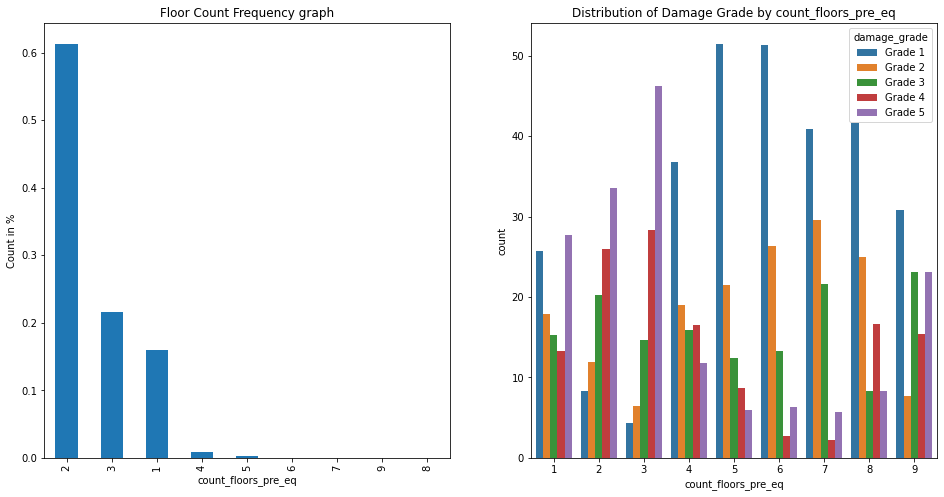

In [277]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
ax = df['count_floors_pre_eq'].value_counts(normalize=True)
ax.plot(kind='bar')
plt.xlabel("count_floors_pre_eq")
plt.ylabel("Count in %")
plt.title("Floor Count Frequency graph")

plt.subplot(1,2,2)
ax = df.groupby(['count_floors_pre_eq','damage_grade']).size().reset_index(name='count')
ax=ax.set_index(["count_floors_pre_eq","damage_grade"])
ax=ax.groupby(level=0).apply(lambda x: 100* x/float(x.sum())).reset_index()
sns.barplot(data=ax,x='count_floors_pre_eq',y='count',hue='damage_grade')
plt.title("Distribution of Damage Grade by count_floors_pre_eq")

Insight:</br>
    
    

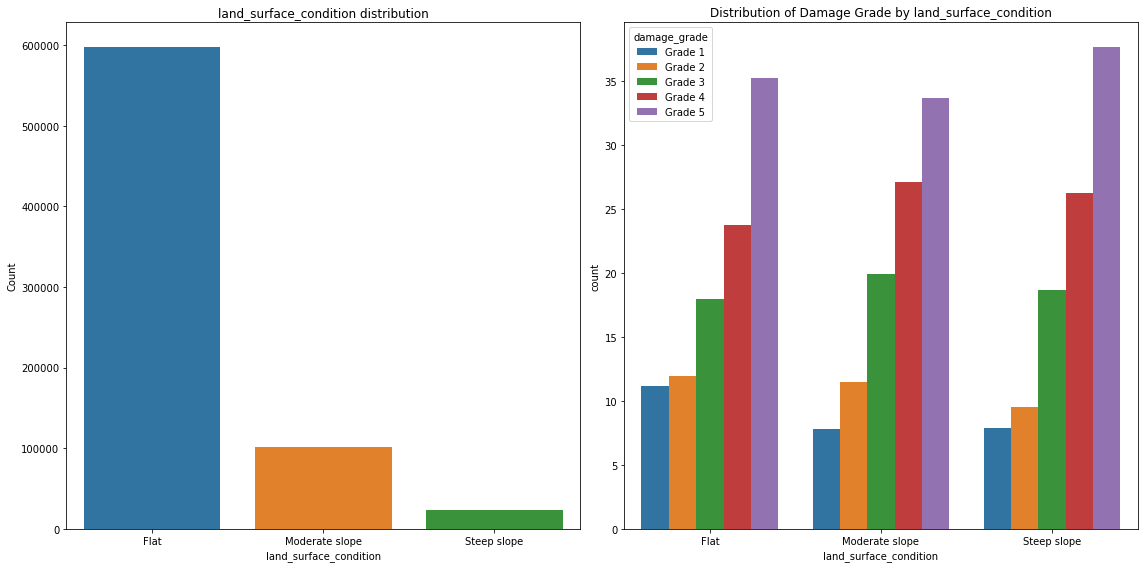

In [278]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.countplot(df["land_surface_condition"])
plt.title("land_surface_condition distribution")
plt.xlabel("land_surface_condition")
plt.ylabel("Count")


plt.subplot(1,2,2)
ax = df.groupby(['land_surface_condition','damage_grade']).size().reset_index(name='count')
ax=ax.set_index(["land_surface_condition","damage_grade"])
ax=ax.groupby(level=0).apply(lambda x: 100* x/float(x.sum())).reset_index()
sns.barplot(data=ax,x='land_surface_condition',y='count',hue='damage_grade')
plt.title("Distribution of Damage Grade by land_surface_condition")                 
plt.tight_layout()


Insight:</br>
    1. Most of the Land surface is of flat type</br>
    2. earthquake had same impact on all the 3 land surface types</br>

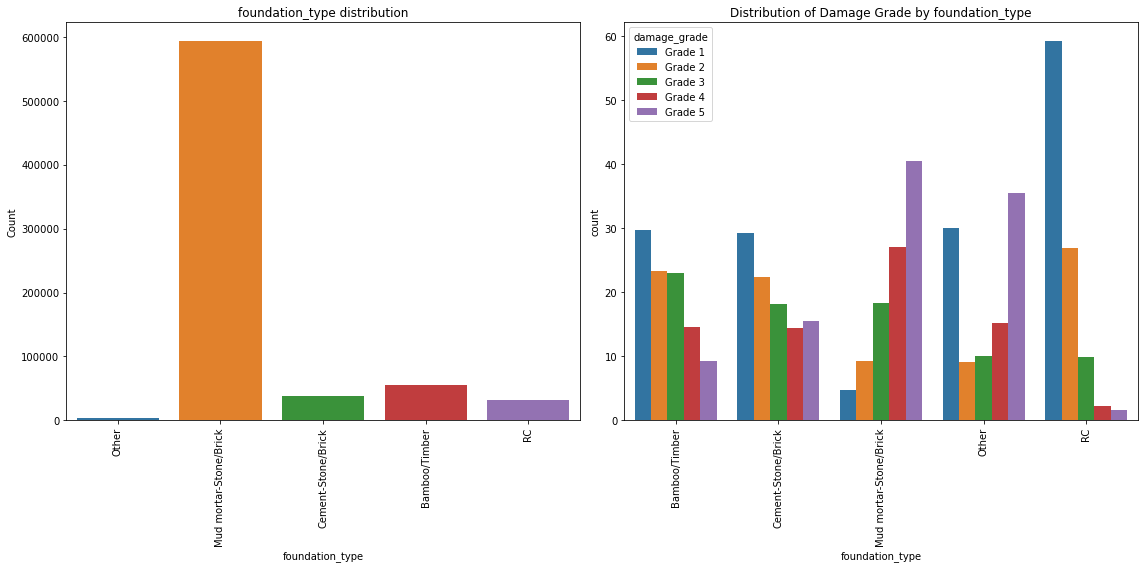

In [279]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.countplot(df["foundation_type"])
plt.title("foundation_type distribution")
plt.xlabel("foundation_type")
plt.ylabel("Count")
plt.xticks(rotation=90)


plt.subplot(1,2,2)
ax = df.groupby(['foundation_type','damage_grade']).size().reset_index(name='count')
ax=ax.set_index(["foundation_type","damage_grade"])
ax=ax.groupby(level=0).apply(lambda x: 100* x/float(x.sum())).reset_index()
sns.barplot(data=ax,x='foundation_type',y='count',hue='damage_grade')
plt.title("Distribution of Damage Grade by foundation_type")       
plt.xticks(rotation=90)
plt.tight_layout()

Insight:</br>
    1. Most of the foundation type observed in Nepal are of Mud mortar-Stone/Brick</br>
    2. earthquake had hight effect on Mud mortar-Stone/Brick foundadtion type

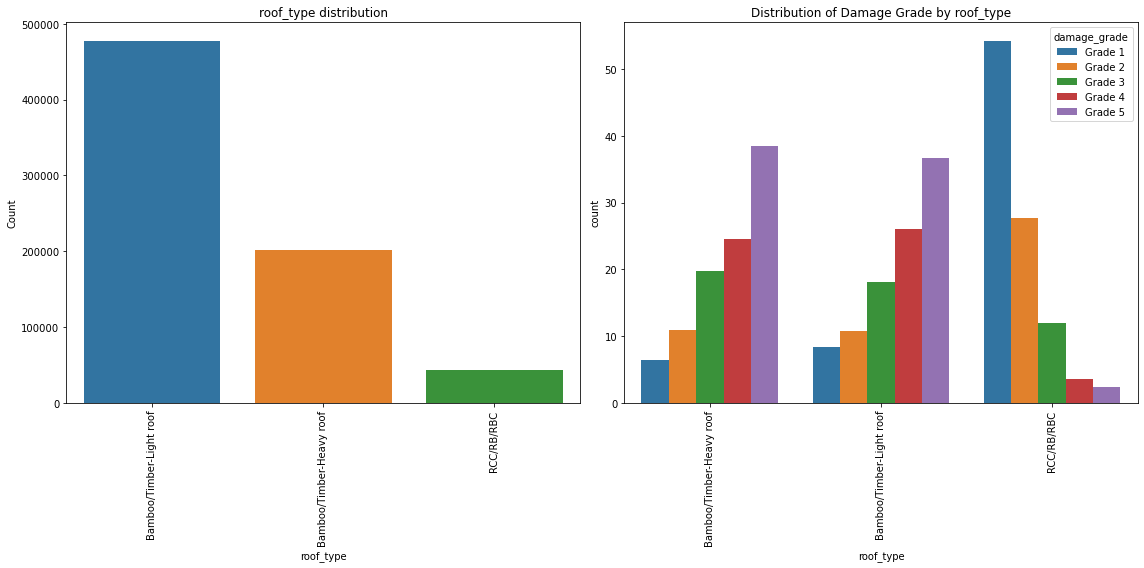

In [280]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.countplot(df["roof_type"])
plt.title("roof_type distribution")
plt.xlabel("roof_type")
plt.ylabel("Count")
plt.xticks(rotation=90)


plt.subplot(1,2,2)
ax = df.groupby(['roof_type','damage_grade']).size().reset_index(name='count')
ax=ax.set_index(["roof_type","damage_grade"])
ax=ax.groupby(level=0).apply(lambda x: 100* x/float(x.sum())).reset_index()
sns.barplot(data=ax,x='roof_type',y='count',hue='damage_grade')
plt.title("Distribution of Damage Grade by roof_type")       
plt.xticks(rotation=90)
plt.tight_layout()

Insight:</br>
    1. Bamboo/Timber-LIght roof are most common in Nepal</br>
    2. Compared to other roof type Bamboo/Timber-heavy had high impact during earthquake 

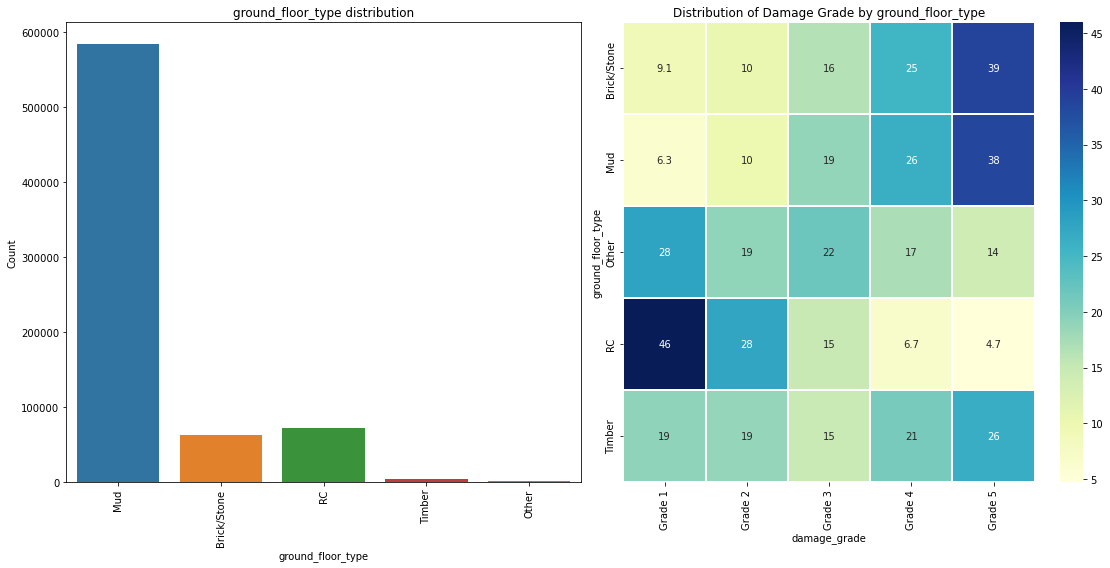

In [281]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.countplot(df["ground_floor_type"])
plt.title("ground_floor_type distribution")
plt.xlabel("ground_floor_type")
plt.ylabel("Count")
plt.xticks(rotation=90)


plt.subplot(1,2,2)
ax = df.groupby(['ground_floor_type','damage_grade']).size().reset_index(name='count')
#Set Index
ax=ax.set_index(["ground_floor_type","damage_grade"])
#Calculate the portion of Grade
ax=ax.groupby(level=0).apply(lambda x: 100* x/float(x.sum())).reset_index()
ax=pd.pivot_table(ax,index="ground_floor_type",columns="damage_grade",values="count")
sns.heatmap(data=ax,annot=True,linewidth=0.2,cmap="YlGnBu")
plt.title("Distribution of Damage Grade by ground_floor_type")       
plt.xticks(rotation=90)
plt.tight_layout()


Insight:</br>
1. This is a categorical variable that indicates the type of ground floor</br>
2. More impact happened for Mud type floor</br>

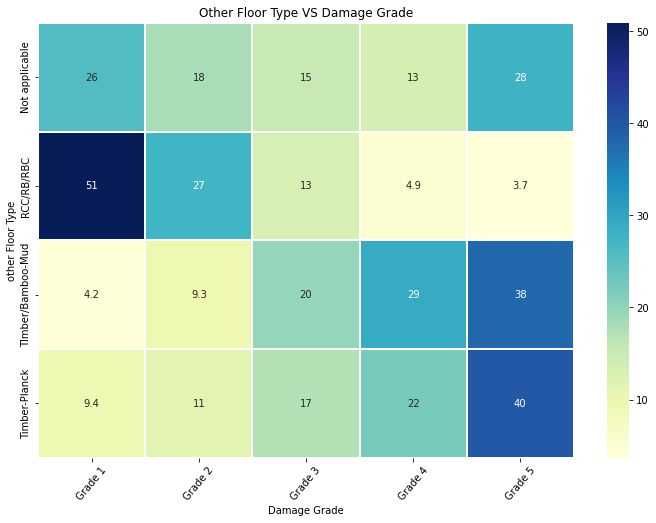

In [282]:
# Damage Grade vs Other Floor Type

ax=df.groupby(['other_floor_type','damage_grade']).size().reset_index(name='Count')
#Set Index
ax=ax.set_index(['other_floor_type','damage_grade'])

#Calculate the portion of Grade
ax=ax.groupby(level=0).apply(lambda x: 100*x/float(x.sum())).reset_index()

ax=pd.pivot(ax,columns='damage_grade',index='other_floor_type',values='Count')
plt.figure(figsize=(12,8))
sns.heatmap(data=ax,annot=True,linewidth=0.2,cmap="YlGnBu")
plt.xticks(rotation=50)
plt.title("Other Floor Type VS Damage Grade")
plt.xlabel("Damage Grade")
plt.ylabel("other Floor Type")
plt.show()

In [283]:
# bin_arr=['land_surface_condition', 'foundation_type', 'roof_type',
#        'ground_floor_type', 'other_floor_type', 'position',
#        'plan_configuration']
# j=0
# plt.figure(figsize=(5,5))
# for i in enumerate(bin_arr):
#     plt.subplot(4,4,i[0]+1)
#     data_s=df.loc[df[i[1]]==1]
#     sns.countplot(x=i[1],data=data_s,hue="damage_grade")
#     plt.title(i+"Distribution")
#     plt.ylabel("Count")
#     plt.xlabel(i)
    
# train_num=x_train.select_dtypes(exclude="object")
# cols=['land_surface_condition','foundation_type','roof_type','ground_floor_type','other_floor_type','position','plan_configuration']

# for i in enumerate(cols):
#     plt.subplot(4,4,i[0]+1)
#     data_s=df.loc[df[i[1]]==1]
#     sns.countplot(x=i[1],data=data_s,hue="damage_grade")
#     plt.tight_layout()

Text(0.5, 0, 'has_superstructure_adobe_mud')

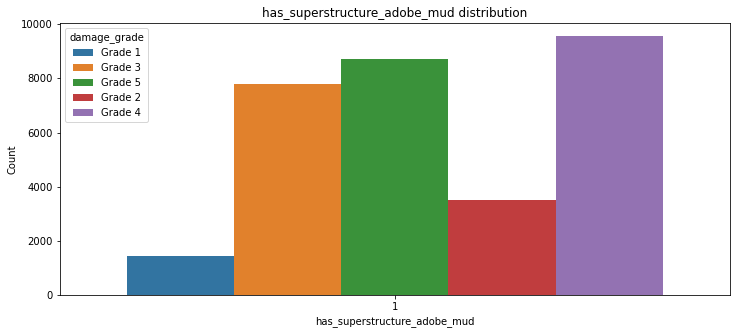

In [284]:
plt.figure(figsize=(12,5))
data_s=df.loc[df["has_superstructure_adobe_mud"]==1]
sns.countplot(x="has_superstructure_adobe_mud",data=data_s,hue="damage_grade")
plt.title("has_superstructure_adobe_mud distribution")
plt.ylabel("Count")
plt.xlabel("has_superstructure_adobe_mud")

Insight:</br>
    1.It indicates if the superstructure was made of Adobe/Mud</br>
    2. superstructure with Adobe/Mud had less impact on earthquake
    

Text(0.5, 0, 'has_superstructure_mud_mortar_brick')

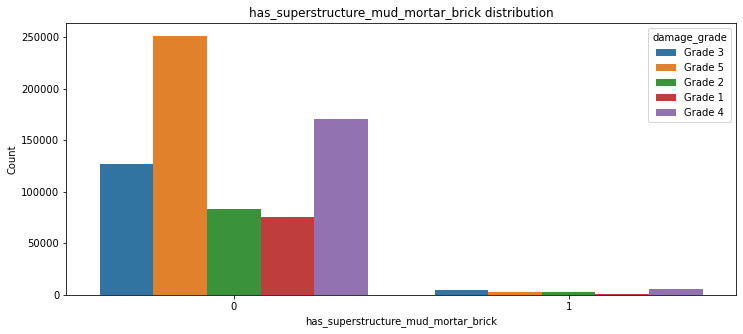

In [285]:
plt.figure(figsize=(12,5))
sns.countplot(x="has_superstructure_mud_mortar_brick",data=df,hue="damage_grade")
plt.title("has_superstructure_mud_mortar_brick distribution")
plt.ylabel("Count")
plt.xlabel("has_superstructure_mud_mortar_brick")

Insight:</br>
1. It indicates if the superstructure was made of Mud Mortar - Brick</br>
2. superstructure with Mud Mortar - Brick had less impact on earthquake

Text(0.5, 0, 'has_superstructure_cement_mortar_brick')

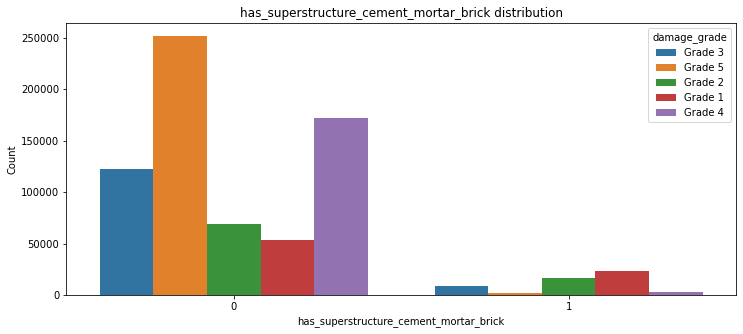

In [286]:
plt.figure(figsize=(12,5))
sns.countplot(x="has_superstructure_cement_mortar_brick",data=df,hue="damage_grade")
plt.title("has_superstructure_cement_mortar_brick distribution")
plt.ylabel("Count")
plt.xlabel("has_superstructure_cement_mortar_brick")

Insight:</br>
1. It indicates if the superstructure was made of Cement Mortar - Brick
2. superstructure with Cement Mortar - Brick had less impact on earthquake

Text(0.5, 0, 'has_superstructure_bamboo')

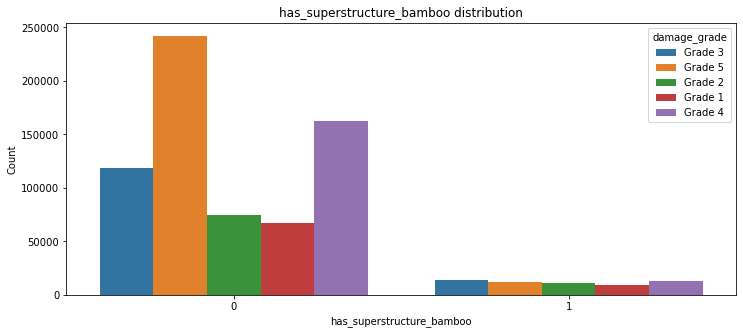

In [287]:
plt.figure(figsize=(12,5))
sns.countplot(x="has_superstructure_bamboo",data=df,hue="damage_grade")
plt.title("has_superstructure_bamboo distribution")
plt.ylabel("Count")
plt.xlabel("has_superstructure_bamboo")

Insight:</br>
1.It indicates if the superstructure was made of Bamboo</br>
2.superstructure made of Bamboo had less impact on earthquake

Text(0.5, 0, 'has_superstructure_rc_engineered')

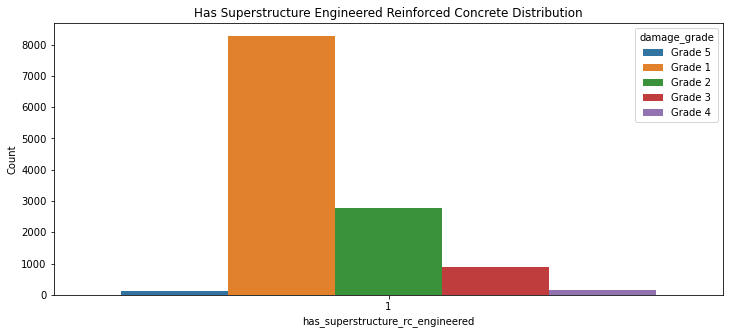

In [288]:
plt.figure(figsize=(12,5))
data_s=df.loc[df["has_superstructure_rc_engineered"]==1]
sns.countplot(x="has_superstructure_rc_engineered",data=data_s,hue="damage_grade")
plt.title("Has Superstructure Engineered Reinforced Concrete Distribution")
plt.ylabel("Count")
plt.xlabel("has_superstructure_rc_engineered")

Insight:</br>
1.It indicates if the superstructure was made of engineered reinforced concrete</br>
2. superstructure made of engineered reinforced concrete had less impact on earthquake

Text(0.5, 0, 'has_superstructure_other')

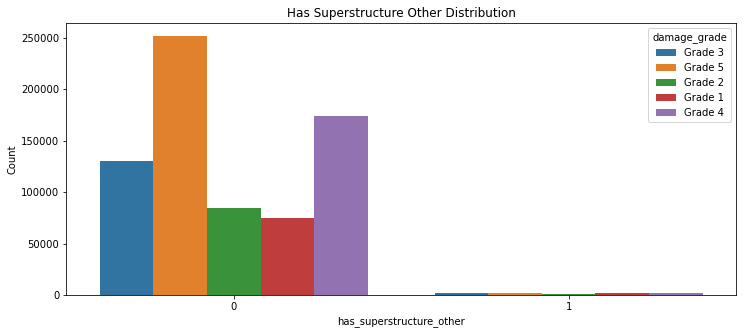

In [289]:
plt.figure(figsize=(12,5))
sns.countplot(x="has_superstructure_other",data=df,hue="damage_grade")
plt.title("Has Superstructure Other Distribution")
plt.ylabel("Count")
plt.xlabel("has_superstructure_other")

Insight:</br>
1.It indicates if the superstructure was made of any other material</br>


In [290]:
# reference
arr_new=["has_superstructure_adobe_mud","has_superstructure_mud_mortar_stone","has_superstructure_stone_flag","has_superstructure_cement_mortar_stone","has_superstructure_mud_mortar_brick","has_superstructure_cement_mortar_brick","has_superstructure_timber","has_superstructure_bamboo","has_superstructure_rc_non_engineered","has_superstructure_rc_engineered","has_superstructure_other"]
new_dict={}
df.shape

(723524, 27)

In [291]:
for i in arr_new:
    new_dict[i]=[df[i].value_counts()[1]] 

In [292]:
#new_dict=pd.DataFrame(new_dict,columns=["Super_Structure_Type","Yes"])
#df["has_superstructure_adobe_mud"].value_counts()
new_dict
#df_dict=pd.DataFrame(new_dict,columns=["Type","Yes"])
df_dict=pd.DataFrame(new_dict)
df_dict=df_dict.T
df_dict=df_dict.reset_index()
df_dict.columns=["Super_structure_Type","Buildings_Having_superstructure"]
df_dict

,Super_structure_Type,Buildings_Having_superstructure
0,has_superstructure_adobe_mud,31011
1,has_superstructure_mud_mortar_stone,574546
2,has_superstructure_stone_flag,25507
3,has_superstructure_cement_mortar_stone,12000
4,has_superstructure_mud_mortar_brick,17221
5,has_superstructure_cement_mortar_brick,53679
6,has_superstructure_timber,189459
7,has_superstructure_bamboo,59002
8,has_superstructure_rc_non_engineered,29631
9,has_superstructure_rc_engineered,12218


In [293]:
df_dict["Buildings_without_superstructure"]=723524-df_dict["Buildings_Having_superstructure"]
df_dict

,Super_structure_Type,Buildings_Having_superstructure,Buildings_without_superstructure
0,has_superstructure_adobe_mud,31011,692513
1,has_superstructure_mud_mortar_stone,574546,148978
2,has_superstructure_stone_flag,25507,698017
3,has_superstructure_cement_mortar_stone,12000,711524
4,has_superstructure_mud_mortar_brick,17221,706303
5,has_superstructure_cement_mortar_brick,53679,669845
6,has_superstructure_timber,189459,534065
7,has_superstructure_bamboo,59002,664522
8,has_superstructure_rc_non_engineered,29631,693893
9,has_superstructure_rc_engineered,12218,711306


In [294]:
df_dict["Buildings_Having_superstructure"].values

array([ 31011, 574546,  25507,  12000,  17221,  53679, 189459,  59002,
        29631,  12218,   8992], dtype=int64)

<BarContainer object of 11 artists>

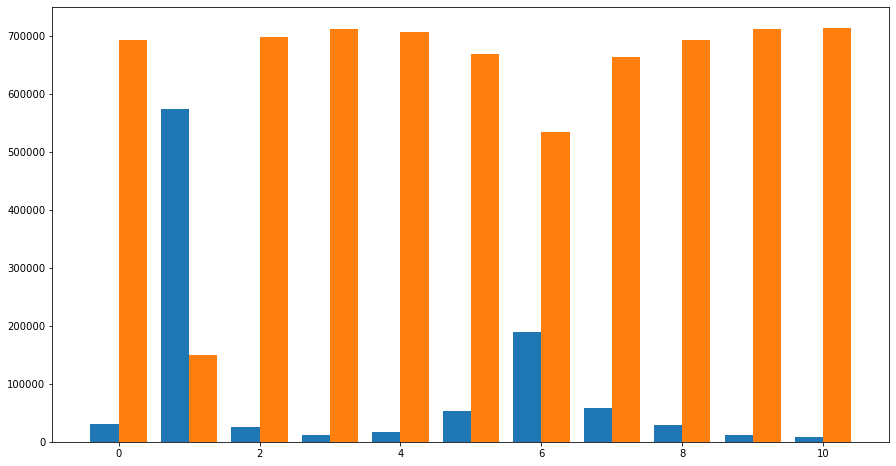

In [295]:
# plt.bar(x="Super_structure_Type",data=df_dict,height=[["Buildings_Having_superstructure","Buildings_without_superstructure"]])



# fig, ax = plt.subplots(figsize=(12, 8))
# x = np.arange(len(df.Super_structure_Type.unique()))

# # Define bar width. We'll use this to offset the second bar.
# bar_width = 0.4

# # Note we add the `width` parameter now which sets the width of each bar.
# b1 = ax.bar(x, df["Buildings_Having_superstructure"],
#             width=bar_width)
# # Same thing, but offset the x by the width of the bar.
# b2 = ax.bar(x + bar_width, df["Buildings_without_superstructure"],
#             width=bar_width)



x = np.arange(11)
y1 = df_dict["Buildings_Having_superstructure"].values
y2 = df_dict["Buildings_without_superstructure"].values
width = 0.40

plt.figure(figsize=(15,8))
# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width)
plt.bar(x+0.2, y2, width)

In [296]:
df_dict.columns

Index(['Super_structure_Type', 'Buildings_Having_superstructure',
       'Buildings_without_superstructure'],
      dtype='object')

# 5. Preprocessing

# 5a. Handling of Outliers

In [297]:
Raw_Data=df.copy()

In [298]:
Raw_Data.head(3)

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,land_surface_condition,foundation_type,...,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade
0,1.200000e+11,12,1207,120703,1,9.0,288.0,9.0,Flat,Other,...,0,0,0,0,0,1,0,0,0,Grade 3
1,1.200000e+11,12,1207,120703,1,15.0,364.0,9.0,Flat,Other,...,0,0,0,0,0,1,0,0,0,Grade 5
2,1.200000e+11,12,1207,120703,1,20.0,384.0,9.0,Flat,Other,...,0,0,0,0,0,0,0,0,0,Grade 2


In [299]:
Raw_Data.columns

Index(['building_id', 'district_id', 'vdcmun_id', 'ward_id',
       'count_floors_pre_eq', 'age_building', 'plinth_area_sq_ft',
       'height_ft_pre_eq', 'land_surface_condition', 'foundation_type',
       'roof_type', 'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'damage_grade'],
      dtype='object')

In [300]:
# Continous Features in the dataset
Continous_col=Raw_Data[['age_building', 'plinth_area_sq_ft','height_ft_pre_eq']]
Disctrete_col=Raw_Data.drop(Continous_col.columns,axis=1)
Disctrete_col=Disctrete_col.select_dtypes(exclude="object")
Disctrete_col.drop(["building_id","district_id","vdcmun_id","ward_id"],axis=1,inplace=True)


In [301]:
Continous_col=Continous_col.columns
Disctrete_col=Disctrete_col.columns
print("continous:",Disctrete_col)
print("Discrete:",Disctrete_col)

continous: Index(['count_floors_pre_eq', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other'],
      dtype='object')
Discrete: Index(['count_floors_pre_eq', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other'],
      dtype='object')


In [302]:
# For Discrete numeric columns, we will check for the unique values
Disctrete_col.nunique()

12

In [303]:
# as we know, Except count_floors_pre_eq , all other feature has 0's & 1s
# We will check the value count as weel for the count_floors_pre_eq

In [304]:
Raw_Data["count_floors_pre_eq"].value_counts()

2    443678
3    155955
1    115867
4      6026
5      1554
6       331
7        88
9        13
8        12
Name: count_floors_pre_eq, dtype: int64

Note: There is no abnormalities in the data

**Handling of Outliers in age_building column**

In [305]:
# Handling of Outliers in the Continous_col
Raw_Data["age_building"].min()
Raw_Data["age_building"].max()

999.0

In [306]:
Raw_Data.loc[Raw_Data["age_building"]==999]

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,land_surface_condition,foundation_type,...,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade
2004,1.200000e+11,12,1208,120802,2,999.0,225.0,25.0,Flat,Bamboo/Timber,...,0,0,0,0,1,1,0,0,0,Grade 2
6113,1.210000e+11,12,1207,120707,2,999.0,347.0,17.0,Flat,Mud mortar-Stone/Brick,...,0,0,0,0,0,0,0,0,0,Grade 3
12068,1.220000e+11,12,1207,120706,2,999.0,540.0,16.0,Flat,Mud mortar-Stone/Brick,...,0,0,0,0,1,0,0,0,0,Grade 5
12090,1.220000e+11,12,1207,120706,2,999.0,540.0,18.0,Flat,Mud mortar-Stone/Brick,...,0,0,0,0,1,0,0,0,0,Grade 4
12124,1.220000e+11,12,1207,120706,1,999.0,540.0,8.0,Flat,Mud mortar-Stone/Brick,...,0,0,0,0,1,0,0,0,0,Grade 4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757638,3.660000e+11,36,3608,360801,2,999.0,280.0,16.0,Flat,Mud mortar-Stone/Brick,...,1,0,0,0,0,0,0,0,0,Grade 4
757705,3.660000e+11,36,3608,360801,2,999.0,310.0,14.0,Flat,Mud mortar-Stone/Brick,...,1,0,0,0,0,0,0,0,0,Grade 5
757723,3.660000e+11,36,3608,360801,2,999.0,320.0,16.0,Flat,Mud mortar-Stone/Brick,...,1,0,0,0,0,0,0,0,0,Grade 4
757789,3.660000e+11,36,3608,360801,2,999.0,240.0,15.0,Flat,Mud mortar-Stone/Brick,...,1,0,0,0,0,0,0,0,0,Grade 4


There are 2666 rows with age as 999. as per google search found there was no this much buildings with 999 age. So we will handle it by IQR method

With winsorizing, any value of a variable above or below a percentile k on each side of the variables<br>' distribution is replaced with the value of the k-th percentile itself.

There are 2666 rows with age as 999. as per google search found there was no this much buildings with 999 age. So we will handle it by winsorize method

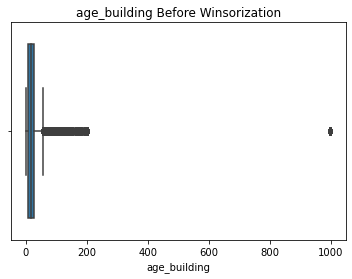

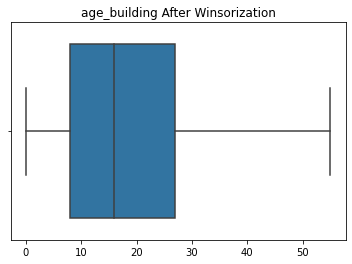

In [307]:
#Data source
name = "age_building"
data = Raw_Data[name]

#Before winsorization
sns.boxplot(data)
plt.title("{} Before Winsorization".format(name))
plt.show()

#Winsorization
winsorized_data = winsorize(data,(0, 0.05))

#After winsorization
sns.boxplot(winsorized_data)
plt.title("{} After Winsorization".format(name))
plt.show()

#Replace data in dataset
Raw_Data[name] = winsorized_data

**Handling of Outliers in height_ft_pre_eq & plinth_area_sq_ft columns**

In [308]:
Raw_Data["height_ft_pre_eq"].max()

99.0

In [309]:
Raw_Data["height_ft_pre_eq"].min()

6.0

In [310]:
Raw_Data["height_ft_pre_eq"].max()

99.0

Since the max & min values of column "height_ft_pre_eq" are genuine kind of ouliers, we are using log transfomation techniques to handle the outliers.
Log transformation is a data transformation method in which it replaces each variable x with a log(x)

				Plinth Area & Height before log tranformation


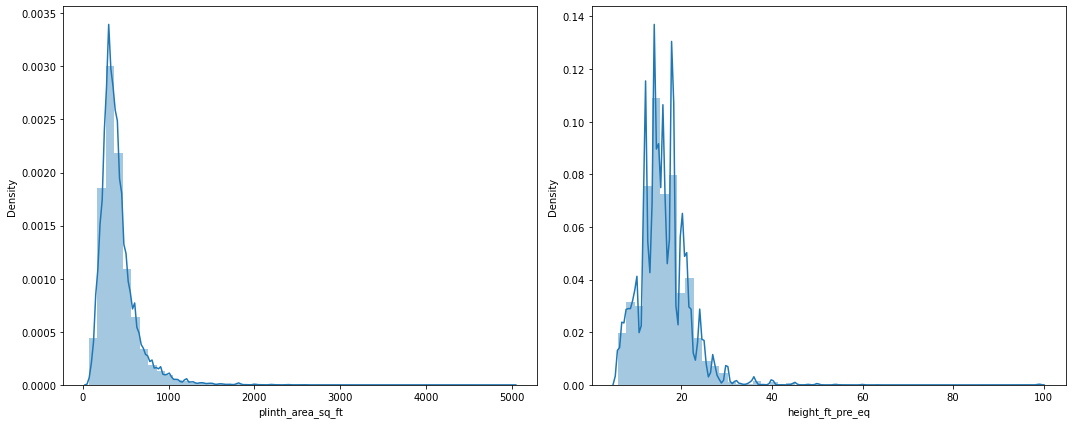

In [311]:
print("\t\t\t\tPlinth Area & Height before log tranformation")
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.distplot(Raw_Data['plinth_area_sq_ft'],kde=True)
plt.subplot(1,2,2)
sns.distplot(Raw_Data['height_ft_pre_eq'],kde=True)
plt.tight_layout()

We can see that due to the presence of outliers, plot distriution plot is skewed

				Plinth Area & Height after log tranformation


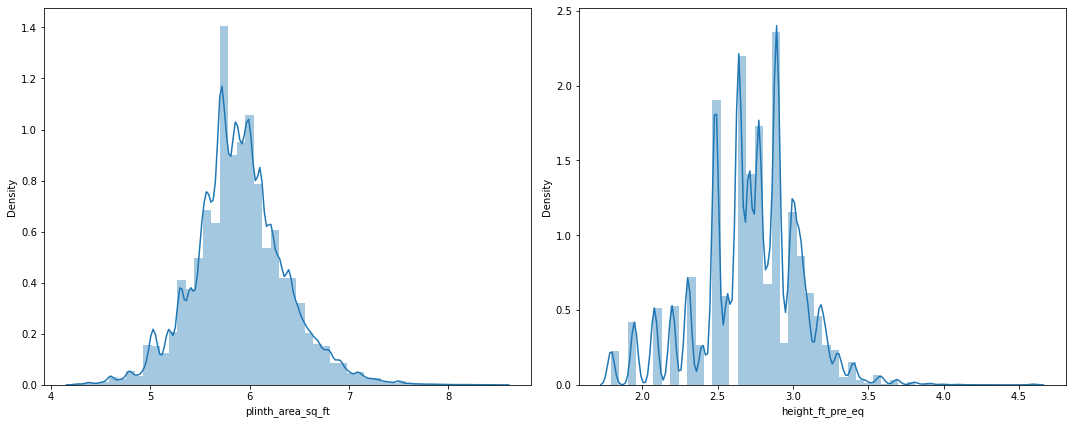

In [312]:
print("\t\t\t\tPlinth Area & Height after log tranformation")
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
Raw_Data['plinth_area_sq_ft'] = np.log(Raw_Data['plinth_area_sq_ft'])
sns.distplot(Raw_Data['plinth_area_sq_ft'],kde=True)
plt.subplot(1,2,2)
Raw_Data['height_ft_pre_eq'] = np.log(Raw_Data['height_ft_pre_eq'])
sns.distplot(Raw_Data['height_ft_pre_eq'],kde=True)
plt.tight_layout()

By the use of log transfomration techniques, outliers got reduced. and our skewdw distribution got tend towards gaussian distribution.

In [313]:
Raw_Data.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,land_surface_condition,foundation_type,...,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade
0,1.200000e+11,12,1207,120703,1,9.0,5.662960,2.197225,Flat,Other,...,0,0,0,0,0,1,0,0,0,Grade 3
1,1.200000e+11,12,1207,120703,1,15.0,5.897154,2.197225,Flat,Other,...,0,0,0,0,0,1,0,0,0,Grade 5
2,1.200000e+11,12,1207,120703,1,20.0,5.950643,2.197225,Flat,Other,...,0,0,0,0,0,0,0,0,0,Grade 2
3,1.200000e+11,12,1207,120703,1,20.0,5.743003,2.197225,Flat,Other,...,0,0,0,0,0,0,0,0,0,Grade 2
4,1.200000e+11,12,1207,120703,1,30.0,5.730100,2.197225,Flat,Other,...,0,0,0,0,0,0,0,0,0,Grade 1


# 5b.Feature Engineering

In [314]:
# Creating new feature risk_based_on_age
Raw_Data["age_building"].max()

55.0

In [88]:
np.linspace(0,55,4)

array([ 0.        , 18.33333333, 36.66666667, 55.        ])

In [89]:
# def risk_based_on_age(x):
#     if 0<=x<18:
#         return "Low Risk"
#     elif 18<=x<36:
#         return "Medium Risk"
#     else:
#         return "High Risk"

In [90]:
# Raw_Data["risk_based_on_age"]=Raw_Data["age_building"].apply(lambda x: risk_based_on_age(x))

In [91]:
# Raw_Data.head(3)

In [92]:
# # Creating new feature "Type of Building"
# def Type_of_Building(x):
#     if 0<=x<4:
#         return "Low Rise Building"
#     elif 4<=x<7:
#         return "Medium Rise Building"
#     else:
#         return "High Rise Building"

In [93]:
# Raw_Data["Type_of_Building"]=Raw_Data["count_floors_pre_eq"].apply(lambda x: Type_of_Building(x))

In [94]:
# Raw_Data.head(3)

In [95]:
# cat=Raw_Data.select_dtypes(include="object")
# cat.columns
# cat_y=cat["damage_grade"]
# # cat_x=cat.drop("damage_grade",axis=1)

In [96]:
# # TO check the correlation between Caegorical Features

# def cramers_v(x, y):
#     confusion_matrix = pd.crosstab(x,y)
#     chi2 = scipy.stats.chi2_contingency(confusion_matrix)[0]
#     n = confusion_matrix.sum().sum()
#     phi2 = chi2/n
#     r,k = confusion_matrix.shape
#     phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
#     rcorr = r-((r-1)**2)/(n-1)
#     kcorr = k-((k-1)**2)/(n-1)
#     return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [97]:
# cramers_v(Raw_Data["count_floors_pre_eq"],Raw_Data["Type_of_Building"])

In [97]:
# cramers_v(Raw_Data["age_building"],Raw_Data["risk_based_on_age"])

Similarly to correlation, the output is in the range of [0,1], where 0 means no association and 1 is full association. (Unlike correlation, there are no negative values, as there’s no such thing as a negative association. Either there is, or there isn’t)

Age Range: Bin
---------------
 0 -  9  : 0
10 - 19  : 1
20 - 29  : 2
30 - 39  : 3
40 - 49  : 4
50 - 59  : 5
60 - 69  : 6

In [98]:
# Creating age bins

Raw_Data['Age_bin_round'] = np.array(np.floor(np.array(Raw_Data['age_building']) / 10.))

In [ ]:
#data['standardized'] = (data['value'] - data['value'].mean()) / data['value'].std()

# 5c. Encoding the Categorical columns

In [315]:
Raw_Data.isna().sum()

building_id                               0
district_id                               0
vdcmun_id                                 0
ward_id                                   0
count_floors_pre_eq                       0
age_building                              0
plinth_area_sq_ft                         0
height_ft_pre_eq                          0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [316]:
Raw_Data.select_dtypes(include="object").columns

Index(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'damage_grade'],
      dtype='object')

In [317]:
#Raw_Data["risk_based_on_age"].value_counts()

In [318]:
# Label Encode the target Variable

ref_df=Raw_Data.copy()

lbl=LabelEncoder()
for i in ['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'damage_grade']:
    ref_df[i]=lbl.fit_transform(ref_df[i])

In [319]:
ref_df

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,land_surface_condition,foundation_type,...,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade
0,1.200000e+11,12,1207,120703,1,9.0,5.662960,2.197225,0,3,...,0,0,0,0,0,1,0,0,0,2
1,1.200000e+11,12,1207,120703,1,15.0,5.897154,2.197225,0,3,...,0,0,0,0,0,1,0,0,0,4
2,1.200000e+11,12,1207,120703,1,20.0,5.950643,2.197225,0,3,...,0,0,0,0,0,0,0,0,0,1
3,1.200000e+11,12,1207,120703,1,20.0,5.743003,2.197225,0,3,...,0,0,0,0,0,0,0,0,0,1
4,1.200000e+11,12,1207,120703,1,30.0,5.730100,2.197225,0,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762101,3.670000e+11,36,3603,360302,2,55.0,5.105945,2.890372,0,2,...,0,0,0,0,0,0,0,0,0,4
762102,3.670000e+11,36,3603,360302,2,35.0,5.834811,2.890372,0,2,...,0,0,0,0,0,0,0,0,0,4
762103,3.670000e+11,36,3603,360302,2,35.0,5.834811,2.890372,0,2,...,0,0,0,0,0,0,0,0,0,4
762104,3.670000e+11,36,3603,360302,2,19.0,5.723585,2.890372,0,2,...,0,0,0,0,0,0,0,0,0,4


# 5d. Feature Importance using Random Forest Classifier


In [320]:
ref_df=Raw_Data.copy()

In [321]:
y=ref_df["damage_grade"]
x=ref_df.drop("damage_grade",axis=1)

In [322]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
rdm=RandomForestClassifier()
rdm.fit(x_train,y_train)
feat_importances=pd.Series(rdm.feature_importances_,index=x.columns).sort_values(ascending=False)*100

In [ ]:
#We can drop columns with Low Feature importance

print("\t\t\tFeature importance using Random Forest Classifier")
plt.figure(figsize=(10,5))
feat_importances.plot(kind='bar')
plt.tight_layout()
plt.show()

Insight: we will drop the features with low importance

In [ ]:
feat_importances

# 5e. Feature Reduction

Text(0.5, 1.0, 'Correlation between Numerical Features')

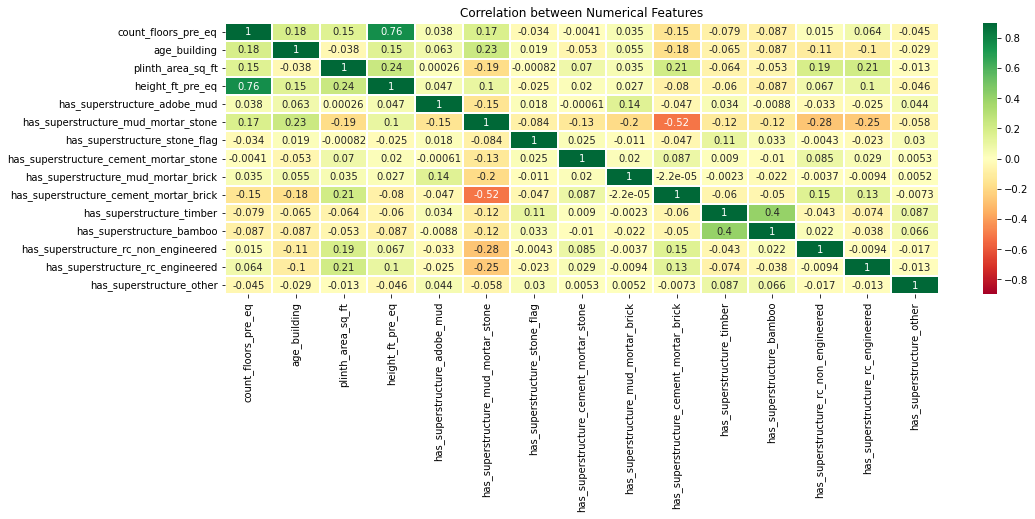

In [324]:
# we will check the correlation between features using heatmap
df_corr=ref_df.copy()
df_corr.drop(["building_id","district_id","vdcmun_id","ward_id"],axis=1,inplace=True)
corr_matrix=df_corr.corr()
plt.figure(figsize=(16,5))
sns.heatmap(corr_matrix,linewidths=0.2,cmap='RdYlGn',annot=True,vmin=-0.9,vmax=0.9)
plt.title("Correlation between Numerical Features")

1. by looking into te heatmap, we can see that count_floors_pre_eq& height_ft_pre_eq have high positive correlatio, </br>
so by looking to feature importance, we can go for droping of count_floors_pre_eq  column
2. We can go for droping of ID columns as well


In [325]:
Raw_Data.isna().sum()
backup=Raw_Data.copy()

In [ ]:
# Droping the Id columns & count of floor
Raw_Data=backup.copy()
Raw_Data.drop(['building_id', 'district_id', 'vdcmun_id', 'ward_id','Age_bin_round'
       ],axis=1,inplace=True)

In [ ]:
# Checking for the relevance of binary columns
super_structure=['has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other']

In [ ]:
arr={}
for i in super_structure:
    arr[i]=Raw_Data[i].sum()/len(Raw_Data)*100
arr

In [ ]:
# # among the above , we can conclude that Only 'has_superstructure_mud_mortar_stone' has more importance, We also found it through 
# feature importance method as well.

In [ ]:
# Droping the columns having less feature importance
Raw_Data.drop(['has_superstructure_timber',
       'plan_configuration', 'has_superstructure_cement_mortar_brick',
       'has_superstructure_bamboo', 'has_superstructure_stone_flag',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_rc_non_engineered', 'has_superstructure_other',
       'has_superstructure_rc_engineered'],axis=1,inplace=True)

In [ ]:
Raw_Data.head()

In [ ]:
Raw_Data.isna().sum()

# Encoding

In [327]:
cat_col=Raw_Data.select_dtypes(include="object").columns

In [328]:
# Checking the categorical feature unique values
Raw_Data[cat_col].nunique()

land_surface_condition     3
foundation_type            5
roof_type                  3
ground_floor_type          5
other_floor_type           4
position                   4
plan_configuration        10
damage_grade               5
dtype: int64

In [329]:
Raw_Data["damage_grade"].value_counts()

Grade 5    253777
Grade 4    175797
Grade 3    131894
Grade 2     85458
Grade 1     76598
Name: damage_grade, dtype: int64

**Label Encoding the Damage grade Feature**

In [330]:
# Label Encoding the Damage grade Feature
lbl=LabelEncoder()
Raw_Data["damage_grade"]=lbl.fit_transform(Raw_Data["damage_grade"])

In [331]:
Raw_Data["damage_grade"].value_counts()

4    253777
3    175797
2    131894
1     85458
0     76598
Name: damage_grade, dtype: int64

In [332]:
Raw_Data.isna().sum()

building_id                               0
district_id                               0
vdcmun_id                                 0
ward_id                                   0
count_floors_pre_eq                       0
age_building                              0
plinth_area_sq_ft                         0
height_ft_pre_eq                          0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

**ONe hot Encoding for the rest of the features**

In [129]:
back_up2=Raw_Data.copy()

In [148]:
back_up2

,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,has_superstructure_mud_mortar_stone,damage_grade
0,1,9.0,5.662960,2.197225,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,1,2
1,1,15.0,5.897154,2.197225,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,1,4
2,1,20.0,5.950643,2.197225,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,1,1
3,1,20.0,5.743003,2.197225,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,1,1
4,1,30.0,5.730100,2.197225,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
762101,2,55.0,5.105945,2.890372,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Attached-2 side,1,4
762102,2,35.0,5.834811,2.890372,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Attached-1 side,1,4
762103,2,35.0,5.834811,2.890372,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Not attached,1,4
762104,2,19.0,5.723585,2.890372,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Not attached,1,4


In [149]:
Raw_Data=back_up2.copy()
cat_col=['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position']
#cat_col=['land_surface_condition', 'roof_type', 'other_floor_type', 'position']

OneHotEncoder from SciKit library only takes numerical categorical values, hence any value of string type should be label encoded before one hot encoded.</br>
pandas.get_dummies is kind of the opposite. By default, it only converts string columns into one-hot representation, unless columns are specified.

In [150]:
Raw_Data.isna().sum()

count_floors_pre_eq                    0
age_building                           0
plinth_area_sq_ft                      0
height_ft_pre_eq                       0
land_surface_condition                 0
foundation_type                        0
roof_type                              0
ground_floor_type                      0
other_floor_type                       0
position                               0
has_superstructure_mud_mortar_stone    0
damage_grade                           0
dtype: int64

In [151]:
Raw_Data[cat_col].nunique()

land_surface_condition    3
foundation_type           5
roof_type                 3
ground_floor_type         5
other_floor_type          4
position                  4
dtype: int64

In [152]:
Raw_Data["land_surface_condition"].value_counts().index

Index(['Flat', 'Moderate slope', 'Steep slope'], dtype='object')

In [153]:
Raw_Data.head()

,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,has_superstructure_mud_mortar_stone,damage_grade
0,1,9.0,5.662960,2.197225,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,1,2
1,1,15.0,5.897154,2.197225,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,1,4
2,1,20.0,5.950643,2.197225,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,1,1
3,1,20.0,5.743003,2.197225,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,1,1
4,1,30.0,5.730100,2.197225,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,1,0


In [154]:
for i in cat_col:
    # label encoding the categorical columns
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(Raw_Data[i])

    #to make it column wise
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    # using the label encoded outputs for one hot encoding
    onehot_encoder = OneHotEncoder(sparse=False)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

    # converting one hot encoder output as a dataframe
    onehot_encoded=pd.DataFrame(onehot_encoded,columns=Raw_Data[i].value_counts().index)

    # Merge it with original dataframe
    
    Raw_Data = pd.merge(Raw_Data, onehot_encoded, left_index=True, right_index=True)
    #This merges two DataFrames only when indexes are matching.


In [155]:
Raw_Data.drop(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position'],axis=1,inplace=True)

By setting this flag, you choose to represent your data in a sparse formatting. This saves a lot of memory when you have an array where most of the elements are zero.

In [156]:
Raw_Data.head()

,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,has_superstructure_mud_mortar_stone,damage_grade,Flat,Moderate slope,Steep slope,Mud mortar-Stone/Brick,...,Timber,Other_y,TImber/Bamboo-Mud,Timber-Planck,Not applicable,RCC/RB/RBC_y,Not attached,Attached-1 side,Attached-2 side,Attached-3 side
0,1,9.0,5.662960,2.197225,1,2,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,15.0,5.897154,2.197225,1,4,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,20.0,5.950643,2.197225,1,1,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,20.0,5.743003,2.197225,1,1,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,30.0,5.730100,2.197225,1,0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [157]:
Raw_Data.isna().sum()

count_floors_pre_eq                    0
age_building                           0
plinth_area_sq_ft                      0
height_ft_pre_eq                       0
has_superstructure_mud_mortar_stone    0
damage_grade                           0
Flat                                   0
Moderate slope                         0
Steep slope                            0
Mud mortar-Stone/Brick                 0
Bamboo/Timber                          0
Cement-Stone/Brick                     0
RC_x                                   0
Other_x                                0
Bamboo/Timber-Light roof               0
Bamboo/Timber-Heavy roof               0
RCC/RB/RBC_x                           0
Mud                                    0
RC_y                                   0
Brick/Stone                            0
Timber                                 0
Other_y                                0
TImber/Bamboo-Mud                      0
Timber-Planck                          0
Not applicable  

In [338]:
# # Catboost encoding the categorical columns

# import category_encoders as ce

# # Define train and target
# target = Raw_Data[['damage_grade']]
# train = Raw_Data.drop('damage_grade', axis = 1)
  
# # Define catboost encoder
# cbe_encoder = ce.cat_boost.CatBoostEncoder()
  
# # Fit encoder and transform the features
# cbe_encoder.fit(train, target)
# train_cbe = cbe_encoder.transform(train)
  
# # We can use fit_transform() instead of fit()
# # and transform() separately as follows:
# # train_cbe = cbe_encoder.fit_transform(train,target)

# Normalising the values in age, plinth and height columns

Min-max feature scaling is often simply referred to as normalization, which rescales the dataset feature to a range of 0 - 1. It’s calculated by subtracting the feature’s minimum value from the value and then dividing it by the difference between the maximum and minimum value.

In [158]:
Raw_Data_back=Raw_Data.copy()

In [160]:
# Standardise the continuos numeric features
cols=["age_building","plinth_area_sq_ft","height_ft_pre_eq",'count_floors_pre_eq']
std=StandardScaler()
Raw_Data[cols]=std.fit_transform(Raw_Data[cols])

In [336]:
Raw_Data=Raw_Data_back.copy()

In [337]:
Raw_Data.head()

,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,has_superstructure_mud_mortar_stone,damage_grade,Flat,Moderate slope,Steep slope,Mud mortar-Stone/Brick,...,Timber,Other_y,TImber/Bamboo-Mud,Timber-Planck,Not applicable,RCC/RB/RBC_y,Not attached,Attached-1 side,Attached-2 side,Attached-3 side
0,1,9.0,5.662960,2.197225,1,2,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,15.0,5.897154,2.197225,1,4,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,20.0,5.950643,2.197225,1,1,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,20.0,5.743003,2.197225,1,1,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,30.0,5.730100,2.197225,1,0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [163]:
cols=["age_building","plinth_area_sq_ft","height_ft_pre_eq",'count_floors_pre_eq']
minmax=MinMaxScaler()
#Raw_Dat=Raw_Data.copy()


In [164]:
Raw_Data[cols]=minmax.fit_transform(Raw_Data[cols])

In [165]:
Raw_Data.head()

,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,has_superstructure_mud_mortar_stone,damage_grade,Flat,Moderate slope,Steep slope,Mud mortar-Stone/Brick,...,Timber,Other_y,TImber/Bamboo-Mud,Timber-Planck,Not applicable,RCC/RB/RBC_y,Not attached,Attached-1 side,Attached-2 side,Attached-3 side
0,0.0,0.163636,0.331358,0.144635,1,2,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.272727,0.386220,0.144635,1,4,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.363636,0.398751,0.144635,1,1,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.363636,0.350109,0.144635,1,1,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.545455,0.347086,0.144635,1,0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [166]:
Raw_Data["count_floors_pre_eq"].value_counts()

0.125    308491
0.250    135717
0.000     64046
0.375      4960
0.500      1391
0.625       305
0.750        73
1.000        11
0.875        10
Name: count_floors_pre_eq, dtype: int64

# Spliting the data set into train & Test set

In [167]:
Y=Raw_Data["damage_grade"]
X=Raw_Data.drop("damage_grade",axis=1)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [168]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(360502, 29) (154502, 29) (360502,) (154502,)


In [467]:
## Get the different grade dataset 

# Grade1 = df[df['damage_grade']=="Grade 1"]
# Grade2 = df[df['damage_grade']=="Grade 2"]
# Grade3 = df[df['damage_grade']=="Grade 3"]
# Grade4 = df[df['damage_grade']=="Grade 4"]
# Grade5 = df[df['damage_grade']=="Grade 5"]

# TYPE1:Cross Validation Like KFOLD and Hyperpaqrameter Tuning
 logistic regression for demonstrate the k-fold

In [206]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [202]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,train_size=0.8)

In [203]:
lr_manual = LogisticRegression()
lr_manual.fit(X_train,y_train)

LogisticRegression()

In [204]:
accuracy_score(y_test,lr_manual.predict(X_test))

0.43395695187425365

**Use StratifiedKFold**

In [209]:
from sklearn.metrics import roc_auc_score

In [215]:
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=45)
pred_test_full =0
cv_score =[]
i=1
for train_index,test_index in kf.split(X,Y):
    #print('{} of KFold {}'.format(i,kf.n_splits))
    
    ### Training Set
    x_train_fold, x_test_fold = X.iloc[train_index],X.iloc[test_index]
    
      
    ### Validation Set
    y_train_fold, y_test_fold = y.iloc[train_index],y.iloc[test_index]
    
    #model
    lr = LogisticRegression()
    lr.fit(x_train_fold, y_train_fold)
    #score = roc_auc_score(yvl,lr.predict(xvl))
    #print('ROC AUC score:',score)
    #cv_score.append(score)
    cv_score.append(lr.score(x_test_fold, y_test_fold))
    
#     pred_test = lr.predict_proba(x_test)[:,1]
#     pred_test_full +=pred_test
   # i+=1

1 of KFold 5
1 of KFold 5
1 of KFold 5
1 of KFold 5
1 of KFold 5


In [216]:
cv_score

[0.4332093863166377,
 0.43452976184697234,
 0.4320249317967787,
 0.4326074504131028,
 0.43249514563106795]

One obvious problem with normal KFold, is that each in each fold the distribution of classes in the validation set, will be not be same. This is a big problem with imbalanced datasets.

To overcome this problem we will use Stratified-KFold Validation. StratifiedKFold ensures that each of the splits have same proportion of examples of each class.

StratifiedKFold is a variation of KFold. First, StratifiedKFold shuffles your data, after that splits the data into n_splits parts and Done. Now, it will use each part as a test set. Note that it only and always shuffles data one time before splitting.

**KFOLD**

In [217]:
10.0 **np.arange(-2,3)

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [181]:
log_class=LogisticRegression()
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)

In [182]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,train_size=0.7)

In [183]:
clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [184]:
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 6032   157   721   741  3772]
 [ 4034   175   873  1088  9495]
 [ 3084   181  1332  1820 20956]
 [ 1845   157  1159  2524 33547]
 [ 1601   100  1001  1548 56559]]
0.4312047740482324
              precision    recall  f1-score   support

           0       0.36      0.53      0.43     11423
           1       0.23      0.01      0.02     15665
           2       0.26      0.05      0.08     27373
           3       0.33      0.06      0.11     39232
           4       0.45      0.93      0.61     60809

    accuracy                           0.43    154502
   macro avg       0.33      0.32      0.25    154502
weighted avg       0.36      0.43      0.32    154502



# **Type2:RandomOverSampler to handle imbalanced data**


In [169]:
from imblearn.over_sampling import RandomOverSampler

In [195]:
os =RandomOverSampler()

In [194]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [196]:
X_train_os, y_train_os = os.fit_sample(x_train, y_train)

In [197]:
X_train_os.shape,y_train_os.shape

((713280, 29), (713280,))

In [173]:
from collections import Counter

In [198]:
# Checking the value counts before & after resampling
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_train_os)))

Original dataset shape Counter({4: 142656, 3: 90579, 2: 63848, 1: 36828, 0: 26591})
Resampled dataset shape Counter({3: 142656, 2: 142656, 1: 142656, 4: 142656, 0: 142656})


In [199]:
classifier=RandomForestClassifier()
classifier.fit(X_train_os,y_train_os)

RandomForestClassifier()

In [200]:
y_pred=classifier.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 4445  2135  1736  1308  1595]
 [ 2676  2891  3199  2968  3872]
 [ 2350  3581  5981  6624  8660]
 [ 2024  3651  7229 11244 15277]
 [ 2429  4697  9147 14845 29938]]
0.35273977035895976
              precision    recall  f1-score   support

           0       0.32      0.40      0.35     11219
           1       0.17      0.19      0.18     15606
           2       0.22      0.22      0.22     27196
           3       0.30      0.29      0.29     39425
           4       0.50      0.49      0.50     61056

    accuracy                           0.35    154502
   macro avg       0.30      0.32      0.31    154502
weighted avg       0.36      0.35      0.35    154502



# TYPE3: Under Sampling

In [185]:
from imblearn.under_sampling import NearMiss

In [187]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [190]:
ns=NearMiss()
X_train_ns,y_train_ns=ns.fit_sample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({4: 142656, 3: 90579, 2: 63848, 1: 36828, 0: 26591})
The number of classes after fit Counter({0: 26591, 1: 26591, 2: 26591, 3: 26591, 4: 26591})


In [191]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [193]:
y_pred=classifier.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 6366  2471  1056   728   598]
 [ 6078  4885  2002  1425  1216]
 [ 9133  9335  3783  2748  2197]
 [12739 13869  5229  4153  3435]
 [19855 22043  7578  6064  5516]]
0.15988789789128943
              precision    recall  f1-score   support

           0       0.12      0.57      0.19     11219
           1       0.09      0.31      0.14     15606
           2       0.19      0.14      0.16     27196
           3       0.27      0.11      0.15     39425
           4       0.43      0.09      0.15     61056

    accuracy                           0.16    154502
   macro avg       0.22      0.24      0.16    154502
weighted avg       0.29      0.16      0.15    154502



# TYPE4: Bagging

In [224]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [219]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [221]:
seed=7
kfold=KFold(n_splits=10,random_state=seed,shuffle=True)

In [223]:
cart=DecisionTreeClassifier()
num_trees=100

In [225]:
model=BaggingClassifier(base_estimator=cart,n_estimators=num_trees,random_state=seed)

In [227]:
result=cross_val_score(model,x_train,y_train,cv=kfold)
for i in range(len(result)):
    print("Model: "+str(i)+"Accuracy is: "+str(result[i]))

Model: 0Accuracy is: 0.38864386563479514
Model: 1Accuracy is: 0.38148733738315166
Model: 2Accuracy is: 0.39031900138696257
Model: 3Accuracy is: 0.38851595006934814
Model: 4Accuracy is: 0.38626907073509015
Model: 5Accuracy is: 0.3880998613037448
Model: 6Accuracy is: 0.388626907073509
Model: 7Accuracy is: 0.3915117891816921
Model: 8Accuracy is: 0.38490984743411927
Model: 9Accuracy is: 0.38296809986130376


# Catboost & xGboost

**Ensemble Techniques**

In [471]:
from imblearn.ensemble import EasyEnsembleClassifier

In [476]:
easy=EasyEnsembleClassifier(random_state=0, n_subsets=10)
easy.fit(x_train,y_train)

TypeError: __init__() got an unexpected keyword argument 'n_subsets'

**Type2:SMOTETomek  to handle imbalanced data**

In [448]:
from imblearn.combine import SMOTETomek

In [450]:
# In this example I use SMOTETomek which is a method of imblearn. SMOTETomek is a hybrid method
# which uses an under sampling method (Tomek) in with an over sampling method (SMOTE).
os_us = SMOTETomek()

X_train_res1, y_train_res1 = os_us.fit_sample(X, Y)


KeyboardInterrupt



In [ ]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [ ]:
os =  RandomOverSampler(ratio=0.5)

In [ ]:
df.select_dtypes(include='O').columns

In [ ]:
df.drop(["building_id","district_id","vdcmun_id","ward_id"],axis=1,inplace=True)

In [ ]:
# Splitting the data into Dependant & Independant Features
y=df["damage_grade"]
x=df.drop("damage_grade",axis=1)

# 5d.Handling of Imbalanced Dataset

**Random oversampling just increases the size of the training data set through repetition of the original examples. It does not cause any increase in the variety of training examples.**

**Oversampling using SMOTE not only increases the size of the training data set, it also increases the variety..**

SMOTE creates new (artificial) training examples based on the original training examples. For instance, if it sees two examples (of the same class) near each other, it creates a third artificial one, bang in the middle of the original two.

SMOTE, when done right, is preferable over plain old random oversampling. One, however, has to be careful about the newly created examples and must make sure that they are ‘legal’. For example, for an input for which legal values are a table and chair, there is no legal in-between value. This, off course, does not apply to, for instance, an input representing the weight of an item.

So use SMOTE, but carefully!**

In [ ]:
from collections import Counter


In [ ]:
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_sample(x,y)

In [ ]:
X_res.shape,y_res.shape

In [ ]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

In [ ]:
X_res

In [ ]:
y_res.value_counts()

# 5e.Feature Selection & Feature Reduction

# 5f.Dimention Reduction

# 6.Modeling